In [ ]:
#Méthodes classiques de Machine Learning comme KNN Imputer et Iterative Imputer.
#Méthodes de Deep Learning comme les autoencodeurs et GANs (réseaux génératifs adverses).

In [ ]:
#telecharger data
import kagglehub
path=kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#visualiser la data
#diabetes=pd.read_csv("/content/diabetes.csv")
diabetes=pd.read_csv("/content/drive/MyDrive/projet_bi/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


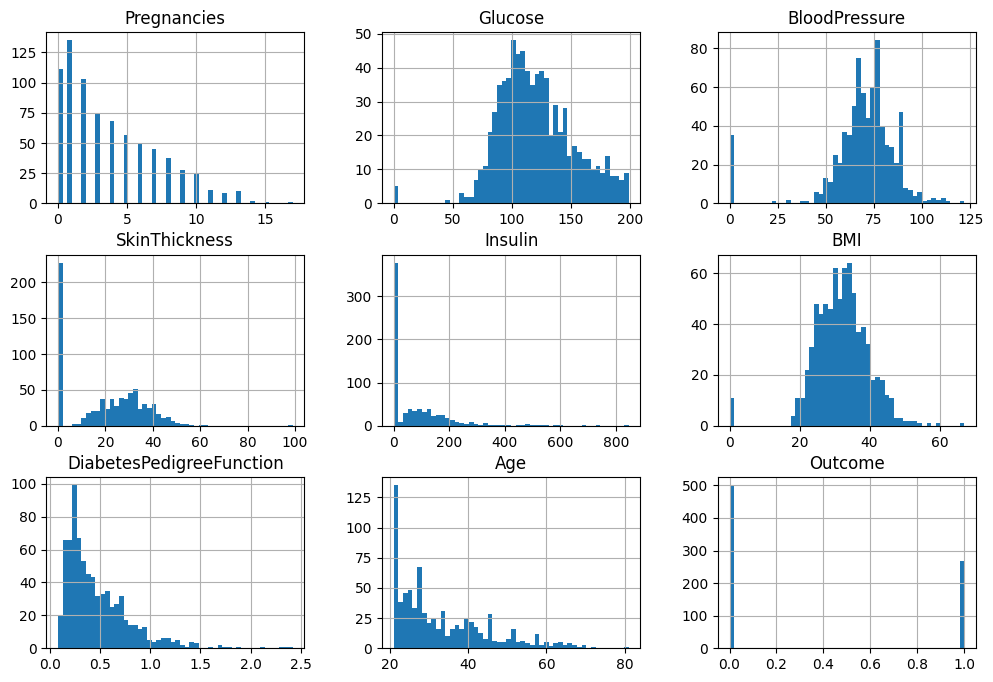

In [ ]:
import matplotlib.pyplot as plt
diabetes.hist(bins=50,figsize=(12,8))
plt.show()

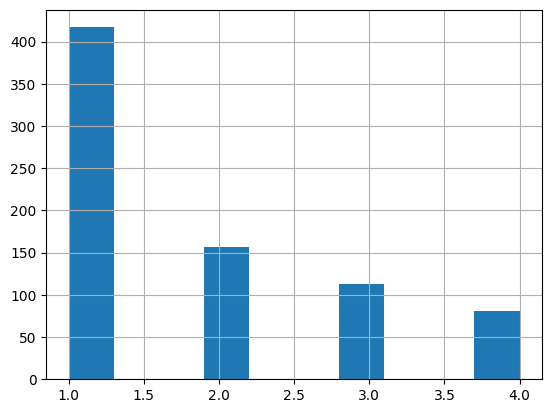

In [ ]:
import numpy as np

diabetes["Age_cat"] = pd.cut(diabetes["Age"],
                            bins=[20, 30, 40, 50, np.inf],
                            labels=[1, 2, 3, 4])

diabetes.Age_cat.hist()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabetes, test_size=0.4, stratify=diabetes["Age_cat"])

In [ ]:
# Drop Age_cat column because we won't use it again
for set_ in (train_set, test_set):
    set_.drop(["Age_cat","Outcome"], axis=1, inplace=True)

In [ ]:
""" #test set
import numpy as np
def introduceMissingValues(df,column_name,ratio):

  column = df[column_name].copy() #copy de la colonne spe
  num_missing_values=int(len(column)*ratio)#Calcul du nombre de valeurs manquantes à insérer
  random_indexes=np.random.choice(column.index,size=num_missing_values,replace=False)#Calcul du nombre de valeurs manquantes à insérer
  df.loc[random_indexes,column_name]=np.nan#Insertion des valeurs manquantes dans les indices choisis
"""



' #test set\nimport numpy as np\ndef introduceMissingValues(df,column_name,ratio):\n\n  column = df[column_name].copy() #copy de la colonne spe\n  num_missing_values=int(len(column)*ratio)#Calcul du nombre de valeurs manquantes à insérer\n  random_indexes=np.random.choice(column.index,size=num_missing_values,replace=False)#Calcul du nombre de valeurs manquantes à insérer\n  df.loc[random_indexes,column_name]=np.nan#Insertion des valeurs manquantes dans les indices choisis\n'

In [ ]:
def missing_method(raw_data, mechanism='mcar', method='uniform', missing_threshold=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    data = raw_data.copy()
    rows, cols = data.shape
    t = missing_threshold

    if mechanism == 'mcar':
        v = np.random.uniform(size=(rows, cols))
        if method == 'uniform':
            mask = v <= t
        elif method == 'random':
            c = np.zeros(cols, dtype=bool)
            c[np.random.choice(cols, cols // 2, replace=False)] = True
            mask = (v <= t) & c[np.newaxis, :]
        else:
            raise ValueError(f"Unknown method: {method}")
    elif mechanism == 'mnar':
        sample_cols = np.random.choice(cols, 2, replace=False)
        m1, m2 = np.median(data[:, sample_cols], axis=0)
        v = np.random.uniform(size=(rows, cols))
        m = (data[:, sample_cols[0]] <= m1) & (data[:, sample_cols[1]] >= m2)
        mask = v <= t
        if method == 'uniform':
            mask &= m[:, np.newaxis]
        elif method == 'random':
            c = np.zeros(cols, dtype=bool)
            c[np.random.choice(cols, cols // 2, replace=False)] = True
            mask &= m[:, np.newaxis] & c[np.newaxis, :]
        else:
            raise ValueError(f"Unknown method: {method}")
    else:
        raise ValueError(f"Unknown mechanism: {mechanism}")

    data[mask] = np.nan
    return data, mask

In [ ]:
train_set_clean=train_set.copy()


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/projet_bi')

from gain_utils import MCAR2unifo
train_set = MCAR2unifo(train_set.values, 50)

/content/drive/MyDrive/projet_bi/gain_utils.py:239: UserWarning: PATTERNS at risk of being all NaN: 16
  warnings.warn(f"PATTERNS at risk of being all NaN: {nPatternsRisk}")


In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_cat'],
      dtype='object')

In [ ]:
diabetes.drop(["Age_cat", "Outcome"], axis=1, inplace=True)


In [ ]:
"""
introduceMissingValues(train_set, "Insulin", ratio=0.3)
introduceMissingValues(train_set, "Glucose", ratio=0.3)
introduceMissingValues(train_set, "BloodPressure", ratio=0.3)
"""
#train_set, mask = missing_method(train_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

train_set = pd.DataFrame(train_set, columns=diabetes.columns)
train_set

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               227 non-null    float64
 1   Glucose                   239 non-null    float64
 2   BloodPressure             232 non-null    float64
 3   SkinThickness             228 non-null    float64
 4   Insulin                   241 non-null    float64
 5   BMI                       224 non-null    float64
 6   DiabetesPedigreeFunction  221 non-null    float64
 7   Age                       228 non-null    float64
dtypes: float64(8)
memory usage: 28.9 KB


In [ ]:
diabetes = pd.DataFrame(train_set, columns=diabetes.columns).copy()

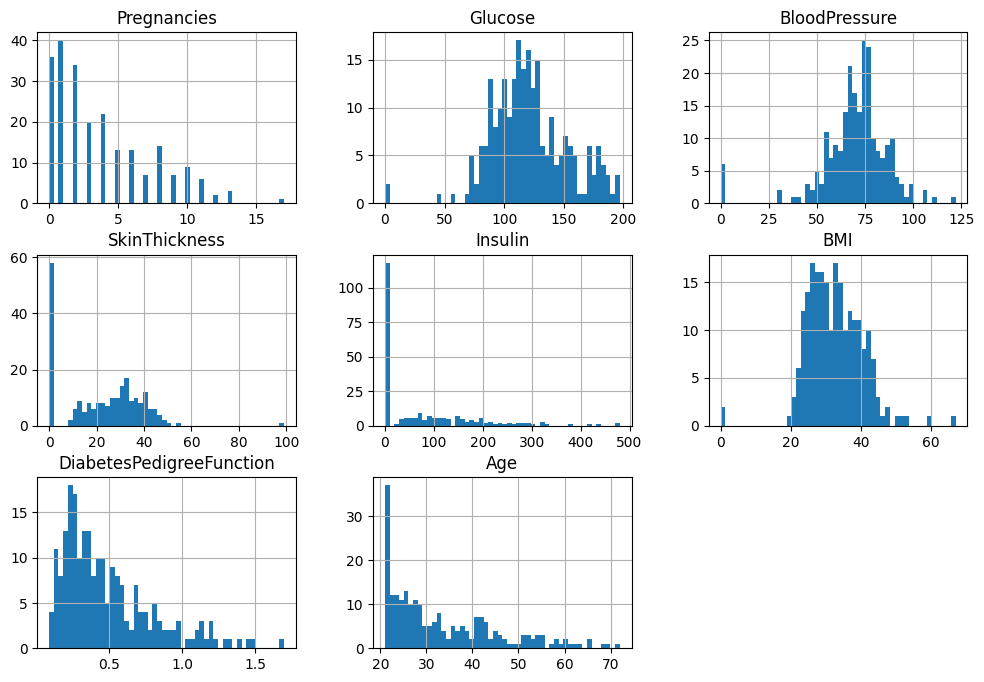

In [ ]:
diabetes.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
corr_matrix = diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.141333,0.314229,0.023290,0.107319,0.010120,0.156707,0.622424
Glucose,0.141333,1.000000,0.167025,0.136864,0.340193,0.368412,0.030929,0.185958
BloodPressure,0.314229,0.167025,1.000000,0.165529,0.020877,0.089419,0.213322,0.227359
SkinThickness,0.023290,0.136864,0.165529,1.000000,0.363043,0.346141,0.145484,-0.216574
Insulin,0.107319,0.340193,0.020877,0.363043,1.000000,0.323376,0.036260,-0.107015
BMI,0.010120,0.368412,0.089419,0.346141,0.323376,1.000000,-0.019405,-0.078261
DiabetesPedigreeFunction,0.156707,0.030929,0.213322,0.145484,0.036260,-0.019405,1.000000,-0.007786
Age,0.622424,0.185958,0.227359,-0.216574,-0.107015,-0.078261,-0.007786,1.000000


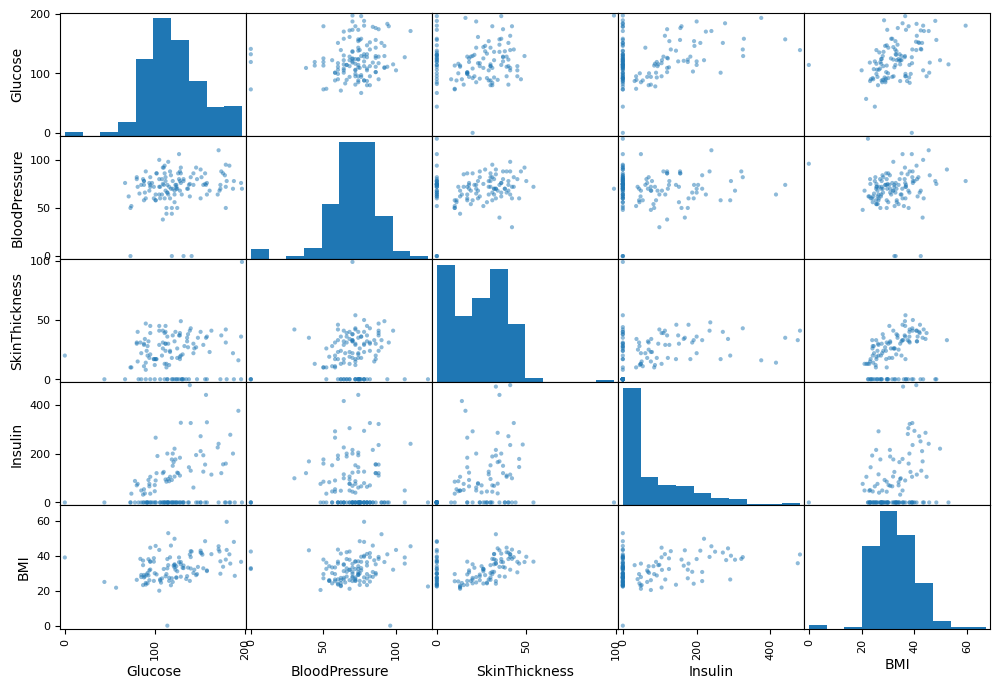

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

scatter_matrix(diabetes[attributes], figsize=(12, 8))
plt.show()

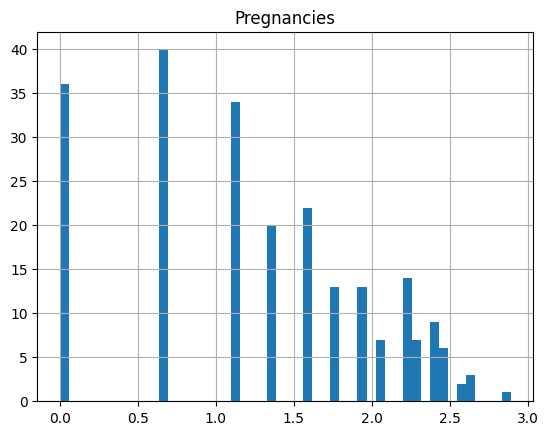

In [ ]:
#import matplotlib.pyplot as plt
# TODO : Measure information loss after transformation
pregnancies_transformed = np.log1p(diabetes[["Pregnancies"]])
pregnancies_transformed.hist(bins=50)
plt.show()

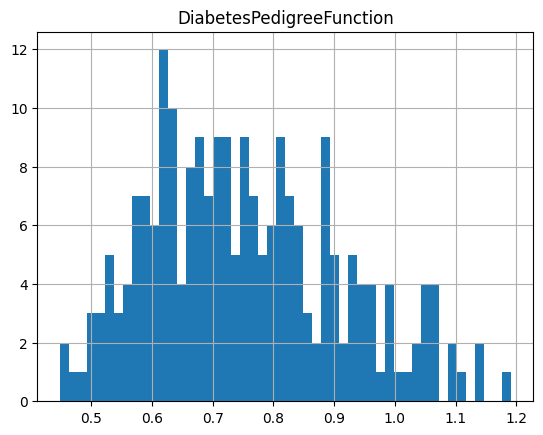

In [ ]:
diabetesPedigreeFunction_transformed = np.power(diabetes[["DiabetesPedigreeFunction"]], 0.33)
diabetesPedigreeFunction_transformed.hist(bins=50)
plt.show()

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
"""from scipy.stats import boxcox
import seaborn as sns

age_transformed, _ = boxcox(diabetes.Age + 1)
plt.figure(figsize=(7, 12))
sns.histplot(age_transformed, kde=True, color="skyblue")"""


'from scipy.stats import boxcox\nimport seaborn as sns\n\nage_transformed, _ = boxcox(diabetes.Age + 1)\nplt.figure(figsize=(7, 12))\nsns.histplot(age_transformed, kde=True, color="skyblue")'

In [ ]:
#pipeline code

from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

from sklearn.metrics import make_scorer

# Définir les transformations des colonnes spécifiques avec indices
transformers = [
    # Log1p transformation for "Pregnancies"
    ("pregnancies_log", FunctionTransformer(np.log1p), ["Pregnancies"]),

    # Cube root transformation for "DiabetesPedigreeFunction"
    ("diabetes_pedigree_cbrt", FunctionTransformer(lambda x: np.power(x, 0.33)), ["DiabetesPedigreeFunction"]),

    # Box-Cox transformation for "Age"
    ("age_boxcox", PowerTransformer(method='box-cox'), ["Age"]),  # Box-Cox requires strictly positive values.
]


# Pipeline des transformations
column_transformer = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Conserver les autres colonnes
)

# Construire le pipeline complet
preprocessing_pipeline = Pipeline([
    ("column_transform", column_transformer),  # Transformations spécifiques
    ("scaler", StandardScaler())            # Normalisation

])

preprocessed_train_set=preprocessing_pipeline.fit_transform(train_set.copy())

# Définir la grille des hyperparamètres pour KNNImputer
param_distributions = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "weights": ["uniform", "distance"],
    "metric": ["nan_euclidean"],  # Seul 'nan_euclidean' est valide
    "missing_values": [np.nan]
}

# Define the RMSE scoring function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Instancier RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=KNNImputer(),
    param_distributions=param_distributions,
    n_iter=1000,      # Augmenter le nombre d'itérations pour une meilleure recherche
    scoring=rmse_scorer,  # Utiliser l'erreur quadratique moyenne
    cv=3,           # Augmenter le nombre de folds pour une meilleure validation
    random_state=42,
    n_jobs=-1       # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche hyperparamétrique
random_search.fit(preprocessed_train_set)  # Appliquer fit(X, y) pour ajuster les hyperparamètres

# Meilleurs paramètres trouvés
print("Best Parameters:", random_search.best_params_)

# Appliquer la transformation et l'imputation
imputed_train_set= random_search.best_estimator_.transform(preprocessed_train_set)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=1000. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'weights': 'uniform', 'n_neighbors': 2, 'missing_values': nan, 'metric': 'nan_euclidean'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [ ]:
def imputation_rmse(clean_data, imputed_data, missing_mask):
    """
    Calculate Root Mean Square Error (RMSE) for imputed values

    Parameters:
    -----------
    clean_data : numpy.ndarray
        The original, complete dataset
    imputed_data : numpy.ndarray
        The dataset after imputation
    missing_mask : numpy.ndarray, optional
        Mask indicating missing values in the original dataset.

    Returns:
    --------
    float
        Root Mean Square Error for the imputed values
    dict
        Detailed performance metrics
    """
    # Validate input shapes
    if clean_data.shape != imputed_data.shape:
        raise ValueError("Clean and imputed datasets must have the same shape")

    # Ensure mask is boolean
    missing_mask = missing_mask.astype(bool)

    # Calculate errors only for missing values
    errors = clean_data[missing_mask] - imputed_data[missing_mask]

    # Calculate RMSE
    rmse = np.sqrt(np.mean(errors**2))

    # Additional performance metrics
    metrics = {
        'rmse': rmse,
        'mae': np.mean(np.abs(errors)),
        'total_missing': np.sum(missing_mask),
        'missing_percentage': np.sum(missing_mask) / missing_mask.size * 100,
        'min_error': np.abs(np.min(errors)),
        'max_error': np.abs(np.max(errors)),
        'std_error': np.std(errors)
    }

    return rmse, metrics


In [ ]:
preprocessed_train_clean_set=preprocessing_pipeline.transform(train_set_clean.copy())

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/projet_bi')

from gain_utils import imputation_rmse
#missing_mask = np.isnan(preprocessed_train_set)
missing_mask = np.isnan(train_set)

imputation_rmse(preprocessed_train_clean_set, imputed_train_set, missing_mask)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


{'rmse': 0.8998261281521418,
 'mae': 0.5137607768786095,
 'total_missing': Pregnancies                 233
 Glucose                     221
 BloodPressure               228
 SkinThickness               232
 Insulin                     219
 BMI                         236
 DiabetesPedigreeFunction    239
 Age                         232
 dtype: int64,
 'missing_percentage': Pregnancies                 6.331522
 Glucose                     6.005435
 BloodPressure               6.195652
 SkinThickness               6.304348
 Insulin                     5.951087
 BMI                         6.413043
 DiabetesPedigreeFunction    6.494565
 Age                         6.304348
 dtype: float64,
 'min_error': 4.6233499690589435,
 'max_error': 5.6817176233358255,
 'std_error': 0.8994629762338525}

In [ ]:
# Introduce missing values in the test set

test_set_clean = test_set.copy()

"""introduceMissingValues(test_set, "Insulin", ratio=0.3)
introduceMissingValues(test_set, "Glucose", ratio=0.3)
introduceMissingValues(test_set, "BloodPressure", ratio=0.3)
"""
#test_set, mask = missing_method(test_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

test_set = MCAR2unifo(test_set.values, 50)
test_set = pd.DataFrame(test_set, columns=diabetes.columns)

test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               155 non-null    float64
 1   Glucose                   151 non-null    float64
 2   BloodPressure             163 non-null    float64
 3   SkinThickness             155 non-null    float64
 4   Insulin                   150 non-null    float64
 5   BMI                       156 non-null    float64
 6   DiabetesPedigreeFunction  149 non-null    float64
 7   Age                       153 non-null    float64
dtypes: float64(8)
memory usage: 19.4 KB


/content/drive/MyDrive/projet_bi/gain_utils.py:239: UserWarning: PATTERNS at risk of being all NaN: 12
  warnings.warn(f"PATTERNS at risk of being all NaN: {nPatternsRisk}")


In [ ]:
# Preprocess the test set

preprocessed_test_set = preprocessing_pipeline.transform(test_set)
preprocessed_test_set_clean = preprocessing_pipeline.transform(test_set_clean)

In [ ]:
# Impute missing values in the test set

imputed_test_set =random_search.best_estimator_.transform(preprocessed_test_set.copy())

In [ ]:
# Compute the RMSE of the imputed test set

missing_mask_test = np.isnan(preprocessed_test_set)

# Check if there are any missing values in the preprocessed_test_set
if missing_mask_test.any():
	rmse = imputation_rmse(preprocessed_test_set_clean, imputed_test_set, missing_mask_test)
	print(f"RMSE: {rmse}")
else:
	print("No missing values in the preprocessed_test_set to compute RMSE.")

RMSE: {'rmse': 1.1704091421053056, 'mae': 0.8985004431992427, 'total_missing': 1232, 'missing_percentage': 50.0, 'min_error': 4.693326086056656, 'max_error': 4.3924236328808455, 'std_error': 1.1702522155695738}
